In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pickle

In [2]:
df = pd.read_csv('Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df.drop(['No'],axis=1,inplace=True)

In [4]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
print(df.shape)
print(df.isnull().sum())

(414, 7)
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


In [6]:
target = df['Y house price of unit area']
df.drop(['Y house price of unit area'],axis=1,inplace=True)
Xtrain,Xtest,Ytrain,Ytest = train_test_split(df,target,test_size=0.2,random_state=0)

In [7]:
model = LinearRegression()
model.fit(Xtrain,Ytrain)

LinearRegression()

In [8]:
predictions = model.predict(Xtest)

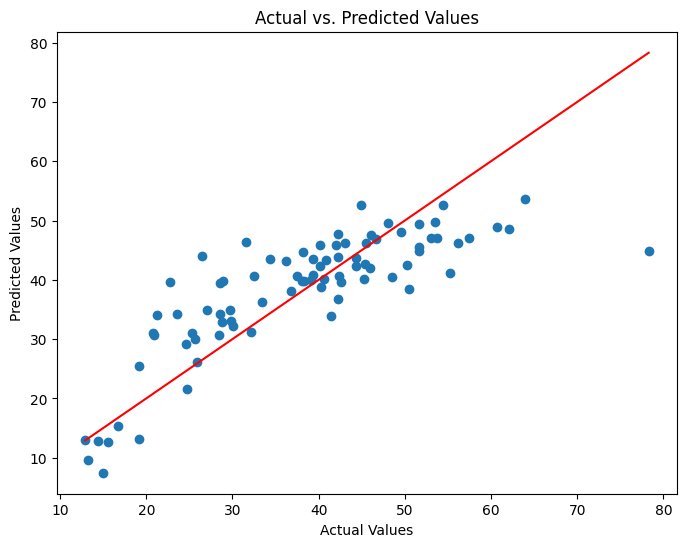

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(Ytest, predictions)
plt.plot([Ytest.min(), Ytest.max()], [Ytest.min(), Ytest.max()],color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [10]:
print('MAE:', metrics.mean_absolute_error(Ytest, predictions))
print('MSE:', metrics.mean_squared_error(Ytest, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Ytest, predictions)))
print('R2', metrics.r2_score(Ytest, predictions))

MAE: 5.760226029972323
MSE: 59.522435319026265
RMSE: 7.715078438941905
R2 0.6573242742217953


In [11]:
print('a = ', model.coef_)
print('b = ', model.intercept_)

a =  [ 5.02037302e+00 -2.63132611e-01 -4.46345490e-03  1.09258054e+00
  2.25488903e+02 -6.80648392e+00]
b =  -14866.721828564865


In [12]:
# Using Pickle library to save my trained model
pickle.dump(model,open('model.pkl','wb'))

In [13]:
# Loading it to check it on a data point
loaded_model = pickle.load(open('model.pkl','rb'))

In [14]:
predicted_value = loaded_model.predict([[2012.833,10.3,211.4473,1,24.97417,121.52999]])
print('Actual Value:',45.3)
print('Predicted Value:',predicted_value)

Actual Value: 45.3
Predicted Value: [40.09548022]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
